In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
# Reading Data
pathInputDir = "../Data Source"


# Currency Information
pathInputDir_Currency = pathInputDir +"/Currency Information/"
EthPrice = "export-EtherPrice.csv"
EthSupply = "export-Ethersupply2.csv"
EthMarketCap = "export-MarketCap.csv"

dfEthPrice = pd.read_csv(pathInputDir_Currency + EthPrice, delimiter=',', dtype='str',header=0)
dfEthSupply = pd.read_csv(pathInputDir_Currency + EthSupply, delimiter=',', dtype='str',header=0)
dfEthMarketCap = pd.read_csv(pathInputDir_Currency + EthMarketCap, delimiter=',', dtype='str',header=0)

# General Information
pathInputDir_General = pathInputDir +"/General Information/"
AddressCount = "export-AddressCount.csv"
TxGrowth = "export-TxGrowth.csv"

dfAddressCount = pd.read_csv(pathInputDir_General + AddressCount, delimiter=',', dtype='str',header=0)
dfTxGrowth = pd.read_csv(pathInputDir_General + TxGrowth, delimiter=',', dtype='str',header=0)

# Network Information
pathInputDir_Network = pathInputDir +"/Network Information/"
Difficulty = "export-BlockDifficulty.csv"
NetworkHash = "export-NetworkHash.csv"
NetworkUtilization = "export-NetworkUtilization.csv"
PendingQueue = "export-PendingQueue.csv"
TransactionFee = "export-TransactionFee.csv"

dfDifficulty = pd.read_csv(pathInputDir_Network + Difficulty, delimiter=',', dtype='str',header=0)
dfNetworkHash = pd.read_csv(pathInputDir_Network + NetworkHash, delimiter=',', dtype='str',header=0)
dfNetworkUtilization = pd.read_csv(pathInputDir_Network + NetworkUtilization, delimiter=',', dtype='str',header=0)
dfPendingQueue = pd.read_csv(pathInputDir_Network + PendingQueue, delimiter=',', dtype='str',header=0)
dfTransactionFee = pd.read_csv(pathInputDir_Network + TransactionFee, delimiter=',', dtype='str',header=0)


# Blockchain Information
pathInputDir_Blockchain = pathInputDir +"/Blockchain Information/"
AvgGasPrice = "export-AvgGasPrice.csv"
BlockCountReward = "export-BlockCountRewards.csv"
BlockSize = "export-BlockSize.csv"
BlockTime = "export-BlockTime.csv"
Ethersupply = "export-Ethersupply.csv"
GasLimit = "export-GasLimit.csv"
GasUsed = "export-GasUsed.csv"
Uncles = "export-Uncles.csv"

dfAvgGasPrice = pd.read_csv(pathInputDir_Blockchain + AvgGasPrice, delimiter=',', dtype='str',header=0)
dfBlockCountReward = pd.read_csv(pathInputDir_Blockchain + BlockCountReward, delimiter=',', dtype='str',header=0)
dfBlockSize = pd.read_csv(pathInputDir_Blockchain + BlockSize, delimiter=',', dtype='str',header=0)
dfBlockTime = pd.read_csv(pathInputDir_Blockchain + BlockTime, delimiter=',', dtype='str',header=0)
dfEthersupply = pd.read_csv(pathInputDir_Blockchain + Ethersupply, delimiter=',', dtype='str',header=0)
dfGasLimit = pd.read_csv(pathInputDir_Blockchain + GasLimit, delimiter=',', dtype='str',header=0)
dfGasUsed = pd.read_csv(pathInputDir_Blockchain + GasUsed, delimiter=',', dtype='str',header=0)
dfUncles = pd.read_csv(pathInputDir_Blockchain + Uncles, delimiter=',', dtype='str', header=0)

# Bitcoin Price
pathInputDir_Bitcoin = pathInputDir +"/bitcoin/"
BTCPrice = "market-price-bitcoin.csv"

dfBTCPrice = pd.read_csv(pathInputDir_Bitcoin + BTCPrice, delimiter=',', dtype='str',names=["Date","BTC_Price"])


dfEthersupply.tail()

,Date(UTC),UnixTimeStamp,Value
1495,9/2/2019,1567382400,13630.1875
1496,9/3/2019,1567468800,13483.6875
1497,9/4/2019,1567555200,13464.3125
1498,9/5/2019,1567641600,13631.8125
1499,9/6/2019,1567728000,13561.75


In [43]:
# Read Files and prepare data frames

price_df = pd.read_csv("../Data Source/export-EtherPrice.csv", header=0)
price_df.rename(index=str, columns={"Value": "Price"},inplace=True)

address_df = pd.read_csv("../Data Source/export-AddressCount.csv", header=0)
address_df.rename(index=str, columns={"Value": "Address"},inplace=True)
address_df.drop(columns=['Date(UTC)'],inplace=True)

supply_df = pd.read_csv("../Data Source/export-Ethersupply2.csv", header=0)
supply_df.rename(index=str, columns={"Value": "Supply"},inplace=True)
supply_df.drop(columns=['Date(UTC)'],inplace=True)

hash_df = pd.read_csv("../Data Source/export-NetworkHash.csv", header=0)
hash_df.rename(index=str, columns={"Value": "Hash"},inplace=True)
hash_df.drop(columns=['Date(UTC)'],inplace=True)

fee_df = pd.read_csv("../Data Source/export-TransactionFee.csv", header=0)
fee_df.rename(index=str, columns={"Value": "Fee"},inplace=True)
fee_df.drop(columns=['Date(UTC)'],inplace=True)

growth_df = pd.read_csv("../Data Source/export-TxGrowth.csv", header=0)
growth_df.rename(index=str, columns={"Value": "Growth"},inplace=True)
growth_df.drop(columns=['Date(UTC)'],inplace=True)

In [46]:
# Merge Data on TimeStamp to create data source

source_df = price_df.merge(address_df, left_on = 'UnixTimeStamp',right_on='UnixTimeStamp',how='inner')
source_df = source_df.merge(supply_df, left_on = 'UnixTimeStamp',right_on='UnixTimeStamp',how='inner')
source_df = source_df.merge(hash_df, left_on = 'UnixTimeStamp',right_on='UnixTimeStamp',how='inner')
source_df = source_df.merge(fee_df, left_on = 'UnixTimeStamp',right_on='UnixTimeStamp',how='inner')
source_df = source_df.merge(growth_df, left_on = 'UnixTimeStamp',right_on='UnixTimeStamp',how='inner')
source_df.head()

,Date(UTC),UnixTimeStamp,Price,Address,Supply,Hash,Fee,Growth
0,7/30/2015,1438214400,0.0,9205,7.204931e+07,11.5297,0,8893
1,7/31/2015,1438300800,0.0,9361,7.208550e+07,51.4594,0,0
2,8/1/2015,1438387200,0.0,9476,7.211320e+07,57.7845,0,0
3,8/2/2015,1438473600,0.0,9563,7.214143e+07,67.9224,0,0
4,8/3/2015,1438560000,0.0,9639,7.216940e+07,74.5737,0,0


In [47]:
source_df.describe()

,UnixTimeStamp,Price,Address,Supply,Hash,Growth
count,1.413000e+03,1413.000000,1.413000e+03,1.413000e+03,1413.000000,1.413000e+03
mean,1.499213e+09,202.815768,1.846760e+07,9.121900e+07,99640.305667,3.330594e+05
std,3.525485e+07,257.308332,2.238519e+07,1.036681e+07,103961.409129,3.188973e+05
min,1.438214e+09,0.000000,9.205000e+03,7.204931e+07,11.529700,0.000000e+00
25%,1.468714e+09,10.710000,4.496270e+05,8.208649e+07,4230.692900,4.081100e+04
50%,1.499213e+09,118.910000,4.060181e+06,9.305860e+07,65978.513700,2.493810e+05
75%,1.529712e+09,296.620000,3.966326e+07,1.002636e+08,180043.865700,5.932030e+05
max,1.560211e+09,1385.020000,6.718279e+07,1.064518e+08,295911.997400,1.349890e+06


In [48]:
source_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413 entries, 0 to 1412
Data columns (total 8 columns):
Date(UTC)        1413 non-null object
UnixTimeStamp    1413 non-null int64
Price            1413 non-null float64
Address          1413 non-null int64
Supply           1413 non-null float64
Hash             1413 non-null float64
Fee              1413 non-null object
Growth           1413 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 99.4+ KB


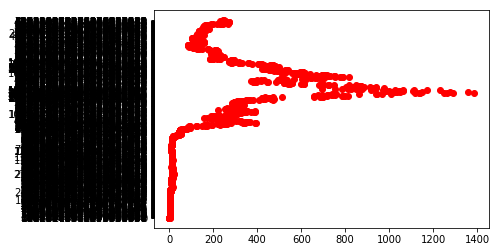

In [50]:
plt.plot(source_df['Price'], source_df['Fee'], 'ro')

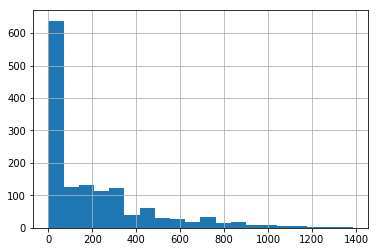

In [53]:
source_df['Price'].hist(bins=20)